# Statistical Methods in Astrophysics Exercises

## Week 01: Introduction

### Personal Information

**Name:** physnya



### Exercise 1: Monte-Carlo $\pi$ estimation with error analysis

#### Question 1.1: "Hit-or-Miss" method

The Monte-Carlo "**Hit-or-Miss**" method is a technique for estimating the area of a complex shape by generating random points within a known bounding rectangle and counting how many of those points fall within the shape.

**Idea:** estimate the value of $\pi$ by simulating random points in a unit square and determining the fraction that falls within a quarter circle inscribed within that square.

**Tasks:**
1. Write a function to estimate the value of $\pi$ using "Hit-or-Miss" in the unit square ($x, y \in [0, 1)$). The function should take the number of random points to generate and random seed as arguments and return the estimated value of $\pi$.
2. For each $N$ in $\{10^2, 10^3, 10^4, 10^5, 10^6\}$, plot the relative error of the $\pi$ estimation ($|\hat{\pi} - \pi| / \pi$, where $\hat{\pi}$ is the estimated $\pi$ value) as a function of $N$. Choose appropriate scales for both axes.
3. Repeat the above step for 10 different random seeds and plot their mean relative errors as a function of $N$. Overplot the standard deviations as error bars.
4. Guess the relationship between the mean relative error and $N$ and overplot it.

In [1]:
# NOTE: Run this cell in the first place
# Load packages for numerical calculations and plotting
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9.6, 5.4)
# Enable inline plotting in Jupyter notebooks
%matplotlib inline

In [2]:
# Define the function for pi estimation via Hit-or-Miss in the unit square
def estimate_pi_hit_or_miss(num_samples, seed = 42):
    """Hit-or-Miss estimate of pi.
    Arguments:
        num_samples (int): Number of random samples to draw.
        seed (int): Random seed for reproducibility (default: 42).
    Returns:
        float: Estimated value of pi.
    """
    rng = np.random.default_rng(seed)   # Create a random number generator with a seed
    x = rng.uniform(0, 1, num_samples)  # Generate uniform random samples in [0, 1)
    y = rng.uniform(0, 1, num_samples)
    # NOTE: EDIT HERE to count points inside the quarter circle
    inside_circle = np.count_nonzero(np.sqrt(x**2 + y**2) < 1)
    return 4 * inside_circle / num_samples

In [3]:
# Define the function for computing the relative error of pi estimation
def relative_error(estimate, true_value=np.pi):
    """Compute the relative error of an estimate compared to the true value.
    Arguments:
        estimate (float): The estimated value.
        true_value (float): The true value to compare against (default: np.pi).
    Returns:
        float: Relative error.
    """
    return np.abs(estimate - true_value) / true_value

In [ ]:
# Set the random seed
seed = 2024011182      # NOTE: EDIT HERE to insert your seed as the seed

# Number of samples to use for pi estimation
num_samples = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]

# Compute the pi estimates and their relative errors
pi_estimates = [estimate_pi_hit_or_miss(n, seed) for n in num_samples]
relative_errors = [relative_error(est) for est in pi_estimates]

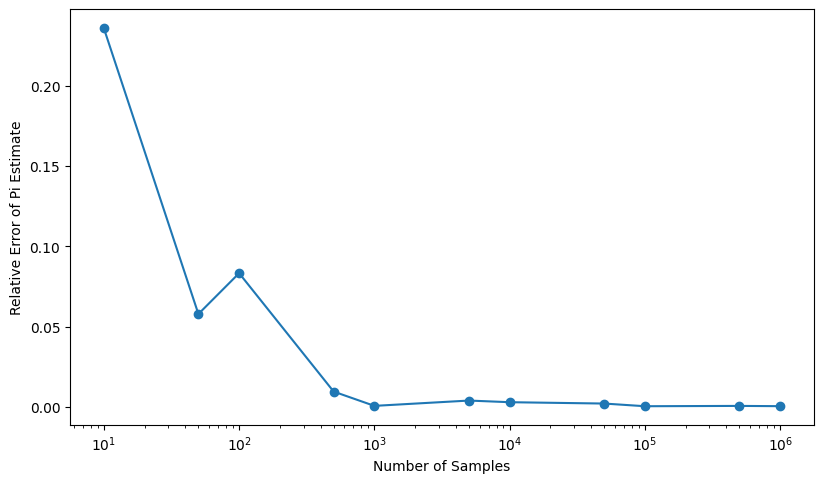

In [5]:
# Plot the relative error as a function of number of samples
plt.plot(num_samples, relative_errors, marker='o')
plt.xlabel('Number of Samples')
plt.ylabel('Relative Error of Pi Estimate')

# NOTE: EDIT HERE to choose appropriate scales for x and y axes
# Reference: https://matplotlib.org/stable/users/explain/axes/axes_scales.html
# Typical scales: 'linear' and 'log', e.g., plt.xscale('log')
plt.xscale('log')
plt.yscale('linear')

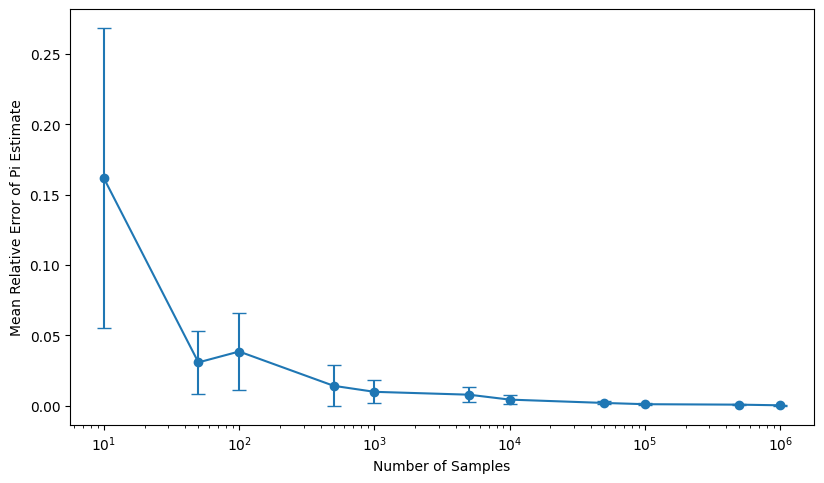

In [ ]:
# Mean relative errors over different seeds
seeds = [seed + i for i in range(10)]   # Different seeds based on seed
mean_relative_errors = []   # To store mean relative errors for each num_samples
stdev_relative_errors = []  # To store standard deviation of relative errors

for n in num_samples:       # Loop over different sample sizes
    pi_estimates = [estimate_pi_hit_or_miss(n, s) for s in seeds]
    relative_errors = [relative_error(est) for est in pi_estimates]
    mean_relative_error = np.mean(relative_errors)
    stdev_relative_error = np.std(relative_errors)
    mean_relative_errors.append(mean_relative_error)
    stdev_relative_errors.append(stdev_relative_error)

# Plot the mean relative error as a function of number of samples with error bars
plt.errorbar(
    num_samples,
    mean_relative_errors,
    yerr = stdev_relative_errors,
    fmt = 'o',
    ls = '-',
    capsize = 5
)
plt.xlabel('Number of Samples')
plt.ylabel('Mean Relative Error of Pi Estimate')

# NOTE: EDIT HERE to choose appropriate scales for x and y axes
plt.xscale('log')
plt.yscale('linear')

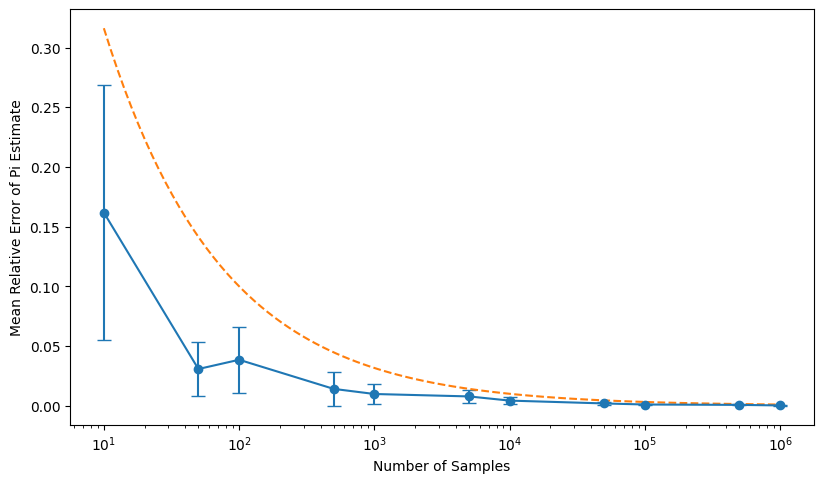

In [7]:
# Guess the error scaling relationship and overplot it
scaling_x = np.logspace(1, 6, 100)  # x values for the scaling line
scaling_y = 1/np.sqrt(scaling_x)    # NOTE: EDIT HERE to define the scaling relationship, e.g., 1/scaling_x

plt.errorbar(
    num_samples,
    mean_relative_errors,
    yerr = stdev_relative_errors,
    fmt = 'o',
    ls = '-',
    capsize = 5,
    label = 'Mean Relative Error'
)
plt.plot(
    scaling_x,
    scaling_y,
    label = 'Scaling Relationship',
    linestyle = '--'
)

plt.xlabel('Number of Samples')
plt.ylabel('Mean Relative Error of Pi Estimate')

# NOTE: EDIT HERE to choose appropriate scales for x and y axes
plt.xscale('log')
plt.yscale('linear')

#### Question 1.2: Sample mean method

The Monte-Carlo **sample mean** method estimates a definite integral by generating random samples from a uniform distribution over the integration domain, evaluating the function at those points, and then calculating the average of these function values. This average is then multiplied by the volume of the integration domain to estimate the integral.

**Idea:** Re-estimate $\pi$, but now using the sample mean method with the integral

$$
\pi = 4 \int_0^1 \sqrt{1 - x^2} \, {\rm d}x
$$

**Tasks:**
1. Write a function to estimate the value of $\pi$ using the sample mean method.
2. On the same $N$ grid as in Question 1.1, plot the mean relative $\pi$ error over 10 different random seeds for both estimators. Overplot the guessed scaling relations.
3. Discuss the results and compare the two methods.

In [8]:
# Define the function for pi estimation via the sample mean method
def estimate_pi_sample_mean(num_samples, seed = 42):
    """Sample Mean estimate of pi.
    Arguments:
        num_samples (int): Number of random samples to draw.
        seed (int): Random seed for reproducibility (default: 42).
    Returns:
        float: Estimated value of pi.
    """
    rng = np.random.default_rng(seed)   # Create a random number generator with a seed
    x = rng.uniform(0, 1, num_samples)  # Generate uniform random samples in [0, 1)
    # NOTE: EDIT HERE to estimate pi using the sample mean method
    f_x = 4 * np.sqrt(1 - x**2)
    pi = sum(f_x * 1/num_samples)
    return pi

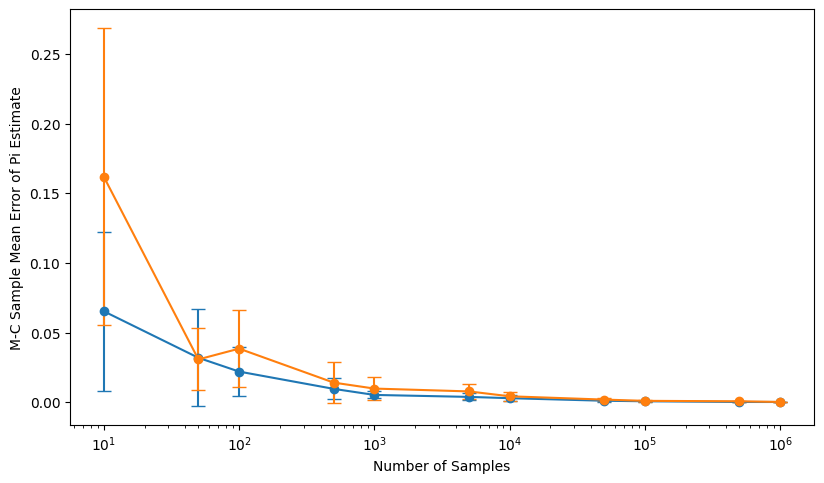

In [9]:
# Compute the relative errors for the sample mean method
mean_relative_errors_sample_mean = []   # To store mean relative errors for each num_samples
stdev_relative_errors_sample_mean = []  # To store standard deviation of relative errors

for n in num_samples:       # Loop over different sample sizes
    pi_estimates = [estimate_pi_sample_mean(n, s) for s in seeds]
    relative_errors = [relative_error(est) for est in pi_estimates]
    mean_relative_error = np.mean(relative_errors)
    stdev_relative_error = np.std(relative_errors)
    mean_relative_errors_sample_mean.append(mean_relative_error)
    stdev_relative_errors_sample_mean.append(stdev_relative_error)

# Plot the mean relative errors with error bars for both methods
plt.errorbar(
    num_samples,
    mean_relative_errors_sample_mean,
    yerr = stdev_relative_errors_sample_mean,
    fmt = 'o',
    ls = '-',
    capsize = 5
)
plt.errorbar(
    num_samples,
    mean_relative_errors,
    yerr = stdev_relative_errors,
    fmt = 'o',
    ls = '-',
    capsize = 5,
    label = 'Mean Relative Error')
plt.xlabel('Number of Samples')
plt.ylabel('M-C Sample Mean Error of Pi Estimate')
plt.xscale('log')
plt.yscale('linear')

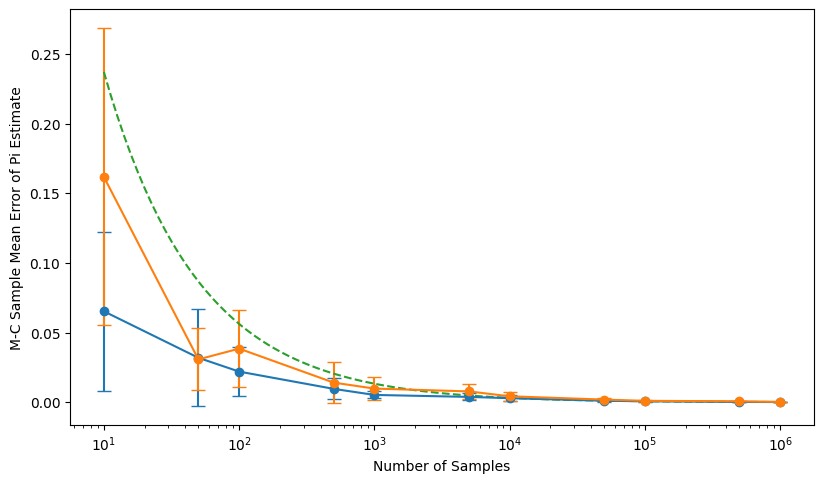

In [10]:
# Guess the error scaling relationships and overplot them
# NOTE: EDIT HERE to define the scaling relationship for sample mean method
scaling_y_sample_mean = 1/(scaling_x)**(5/8)

# Plot the mean relative errors for both methods with guessed scalings
plt.errorbar(
    num_samples,
    mean_relative_errors_sample_mean,
    yerr = stdev_relative_errors_sample_mean,
    fmt = 'o',
    ls = '-',
    capsize = 5
)
plt.errorbar(
    num_samples,
    mean_relative_errors,
    yerr = stdev_relative_errors,
    fmt = 'o',
    ls = '-',
    capsize = 5,
    label = 'Mean Relative Error'
)
plt.plot(
    scaling_x,
    scaling_y_sample_mean,
    label = 'Scaling Relationship',
    linestyle = '--'
)
plt.xlabel('Number of Samples')
plt.ylabel('M-C Sample Mean Error of Pi Estimate')
plt.xscale('log')
plt.yscale('linear')

##### Discussions

Compared with the first method estimating $\pi$, the second method has less error, and the error function falls off more rapidly with the increase of number of samples. So maybe the second method is better.

### Exercise 2: Monte-Carlo $\pi$ estimation with mask

#### Question 2.1: "Hit-or-Miss" method with mask

**Idea:** Suppose we cannot sample the entire unit square (e.g., due to CCD gaps) and there is a vertical mask with width 0.2.

**Tasks:**
1. Modify the "Hit-or-Miss" function to account for a vertical mask with a forbidden region $x \in [0.6, 0.8), y \in [0, 1)$.
2. Suppose we do not know the exact position of the mask, but we know its width (0.2), what is the best strategy to estimate $\pi$? Implement it and plot the mean relative error as a function of $N$ with the same $N$ grid as in Question 1.1.

**Hint:** Since the position of the mask is unknown, you cannot estimate the area of the masked region directly. Instead, you can use a statistical approach.

In [11]:
# Define the function for pi estimation via Hit-or-Miss with a vertical mask
def estimate_pi_hit_or_miss_with_mask(num_samples, mask_start = 0.6, mask_end = 0.8, seed = 42):
    """Hit-or-Miss estimate of pi with a vertical mask.
    Arguments:
        num_samples (int): Number of random samples to draw.
        mask_start (float): Start of the mask in x (default: 0.6).
        mask_end (float): End of the mask in x (default: 0.8).
        seed (int): Random seed for reproducibility (default: 42).
    Returns:
        float: Estimated value of pi.
    """
    rng = np.random.default_rng(seed)   # Create a random number generator with a seed
    x = rng.uniform(0, 1, num_samples)  # Generate uniform random samples in [0, 1)
    y = rng.uniform(0, 1, num_samples)
    
    # Apply the mask: filter out points that fall within the masked region
    valid_indices = (x < mask_start) | (x >= mask_end)
    x_valid = x[valid_indices]
    y_valid = y[valid_indices]

    # NOTE: EDIT HERE to estimate pi using the valid points only
    # estimate pi
    inside_circle_valid = np.count_nonzero(np.sqrt(x_valid**2 + y_valid**2) < 1)
    
    return 4 * (inside_circle_valid / len(x_valid))

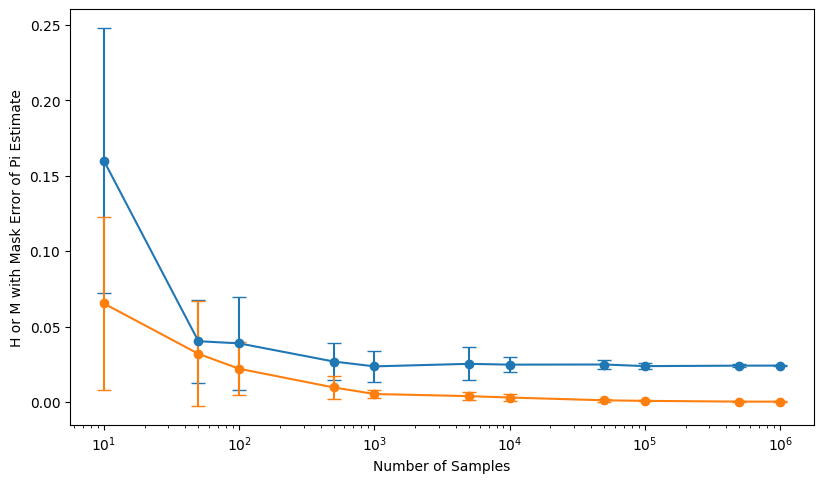

In [12]:
# Compute the relative errors for the masked Hit-or-Miss method with different numbers of samples

mean_relative_errors_hit_or_miss_with_mask = []   # To store mean relative errors for each num_samples
stdev_relative_errors_hit_or_miss_with_mask = []  # To store standard deviation of relative errors

for n in num_samples:       # Loop over different sample sizes
    pi_estimates = [estimate_pi_hit_or_miss_with_mask(n, mask_start = 0.6, mask_end = 0.8, seed = s) for s in seeds]
    relative_errors = [relative_error(est) for est in pi_estimates]
    mean_relative_error = np.mean(relative_errors)
    stdev_relative_error = np.std(relative_errors)
    mean_relative_errors_hit_or_miss_with_mask.append(mean_relative_error)
    stdev_relative_errors_hit_or_miss_with_mask.append(stdev_relative_error)

# Plot the mean relative errors with error bars for both methods
plt.errorbar(
    num_samples,
    mean_relative_errors_hit_or_miss_with_mask,
    yerr = stdev_relative_errors_hit_or_miss_with_mask,
    fmt = 'o',
    ls = '-',
    capsize = 5
)
plt.errorbar(
    num_samples,
    mean_relative_errors_sample_mean,
    yerr = stdev_relative_errors_sample_mean,
    fmt = 'o',
    ls = '-',
    capsize = 5
)
plt.xlabel('Number of Samples')
plt.ylabel('H or M with Mask Error of Pi Estimate')
plt.xscale('log')
plt.yscale('linear')

#### Question 2.2: Uncertainty estimation

**Idea:** The true mask position is $x \in [0.6, 0.8)$ but it is unknown. Our information is incomplete due to the mask. We need to report an uncertainty estimate along with our $\pi$ estimate.

**Tasks:**
1. Estimate the uncertainty of $\pi$ estimate by assuming the center of mask is uniformly distributed in $[0.1, 0.9)$.
2. Plot the mean relative error and the uncertainty as a function of $N$ with the same $N$ grid as in Question 1.1.
3. Discuss the results.

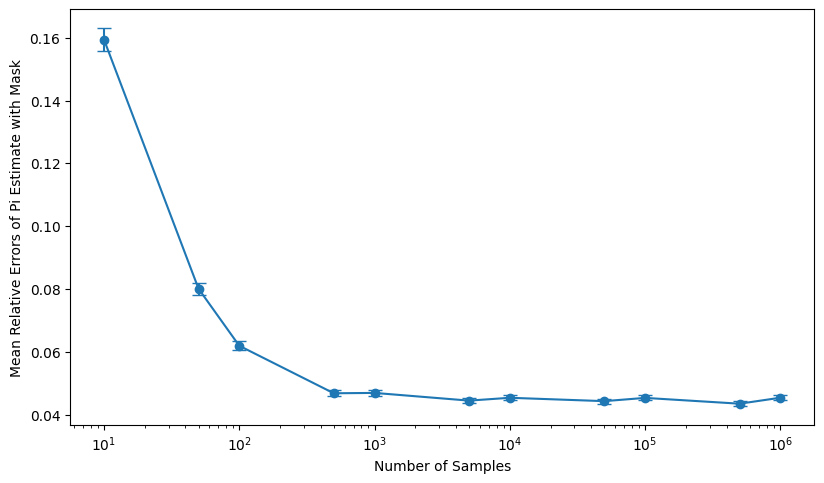

In [13]:
# Report an uncertainty estimate along with your pi estimate

def relative_error_with_mask(num_samples, num_trials = 100):
    """
    Calculate mean relative error and uncertainty for pi estimation with random mask positions.
    
    Arguments:
        num_samples (list): List of different sample sizes to test.
        num_trials (int): Number of trials for each sample size to estimate uncertainty.
    
    Returns:
        tuple: (mean_relative_errors, uncertainties)
    """
    mean_relative_errors_hit_or_miss_with_mask = []   # To store mean relative errors for each num_samples
    uncertainties = []          # To store uncertainty estimates for each num_samples

    for n in num_samples:       # Loop over different sample sizes
        relative_errors = []
        
        for trial in range(num_trials):
            # Randomly select mask center uniformly from [0.1, 0.9)
            mask_center = np.random.uniform(0.1, 0.9)
            
            # Use trial number as seed for reproducibility
            pi_estimate = estimate_pi_hit_or_miss_with_mask(
                n, mask_start = mask_center - 0.1, mask_end = mask_center + 0.1, seed = trial
            )
            relative_errors.append(relative_error(pi_estimate))
        
        # Calculate mean and uncertainty (standard deviation of the mean)
        mean_relative_error = np.mean(relative_errors)
        uncertainty = np.std(relative_errors) / np.sqrt(num_trials)  # uncertainty of uniform distribution
        
        mean_relative_errors_hit_or_miss_with_mask.append(mean_relative_error)
        uncertainties.append(uncertainty)
    
    return np.array(mean_relative_errors_hit_or_miss_with_mask), np.array(uncertainties)

mean_relative_errors_hit_or_miss_with_mask, uncertainties = relative_error_with_mask(num_samples, 1000)

plt.errorbar(
    num_samples,
    mean_relative_errors_hit_or_miss_with_mask,
    yerr = uncertainties,
    fmt = "o",
    ls = "-",
    capsize = 5
)
plt.xlabel('Number of Samples')
plt.ylabel('Mean Relative Errors of Pi Estimate with Mask')
plt.xscale('log')
plt.yscale('linear')

##### Discussions

If we do not know how the mask distributes, our estimate is incomplete. But we can guess the probable distribution function of mask, and calculate the uncertainties of each $N$, in order to cover the true value of $\pi$.

### Exercise 3: Logistic map as a "random" source

The [**Logistic map**](https://en.wikipedia.org/wiki/Logistic_map) is a recurrence polynomial mapping:

$$
x_{n+1} = r x_n (1 - x_n)
$$

where $r$ is a parameter (typically in the range $[0, 4]$) and $x_n$ is a number between 0 and 1. The logistic map is a classic example of how deterministic systems can exhibit chaotic behaviour for certain values of $r$.

With the transformation

$$
u_n = \frac{2}{\pi} \arcsin(\sqrt{x_n})
$$

the logistic map with $r=4$ can be shown to have a uniform invariant distribution in $(0, 1)$.

**Idea:** Show that "randomness" required by Monte-Carlo methods does not necessarily mean "unpredictability". A deterministic chaotic system can also be used as a pseudo-random number generator.

**Tasks:**
1. Define $x_{n+1} = 4 x_n (1 - x_n)$ with $x_0$ from a fixed seed in $(0, 1)$. Use the sequence $\{u_n\}$ as "uniform randoms" in $(0,1)$, where $u_n = 2 \arcsin(\sqrt{x_n}) / \pi$.
2. For each $N$ in $\{10^2, 10^3, 10^4, 10^5\}$, plot the histogram of the first $N$ values of the logistic map and compare it with the uniform distribution.
3. Use the logistic map to estimate $\pi$ using the "Hit-or-Miss" method. Plot the relative errors together with that using `numpy`'s random number generator as a function of $N$.
4. Discuss the results.

In [14]:
# "Random" number generator with logistic map
def logistic_map_sequence(N, x0=0.5, r=4.0):
    """Generate a sequence of pseudo-random numbers using the logistic map.
    Arguments:
        N (int): Number of random numbers to generate.
        x0 (float): Initial value (default: 0.5).
        r (float): Parameter for the logistic map (default: 4.0).
    Returns:
        np.ndarray: Array of pseudo-random numbers in (0,1).
    """
    x = x0
    seq = []
    for _ in range(N):
        x = r * x * (1 - x)
        u = (2 / np.pi) * np.arcsin(np.sqrt(x))
        seq.append(u)
    return np.array(seq)

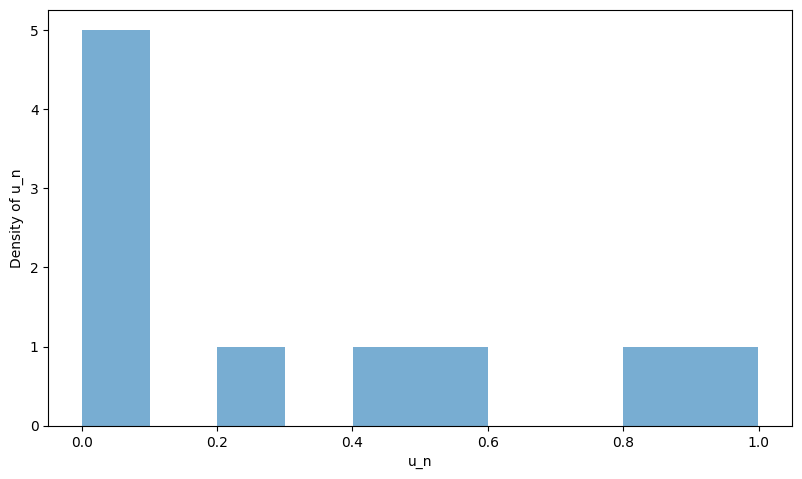

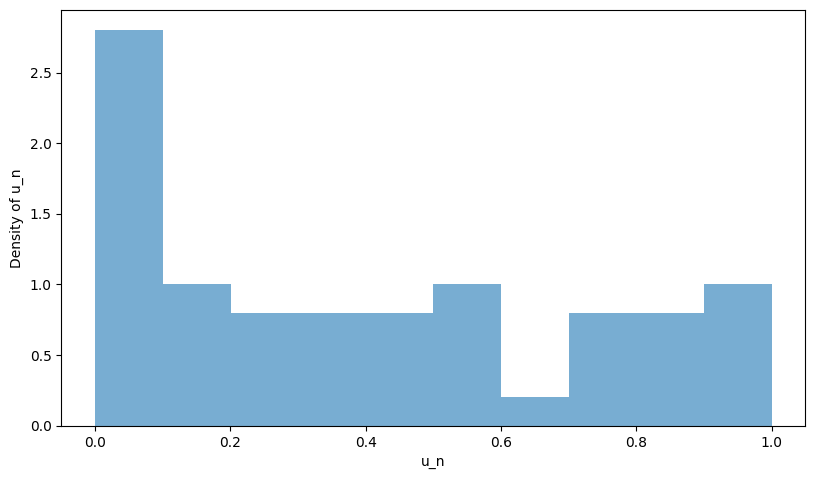

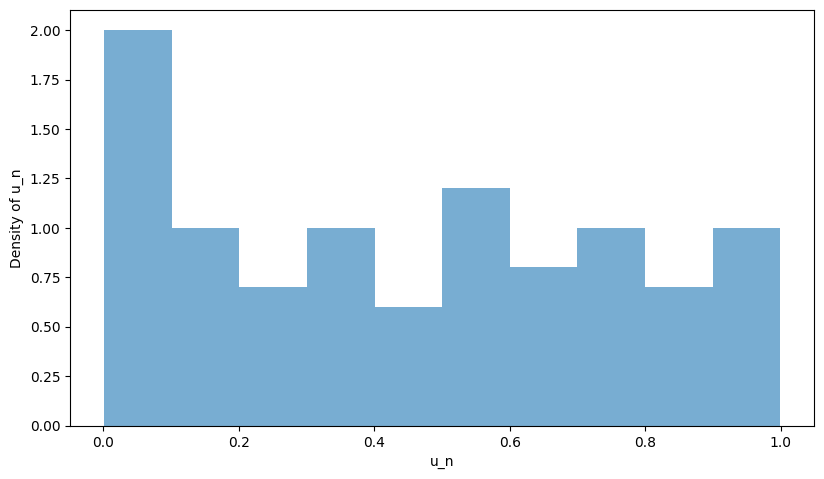

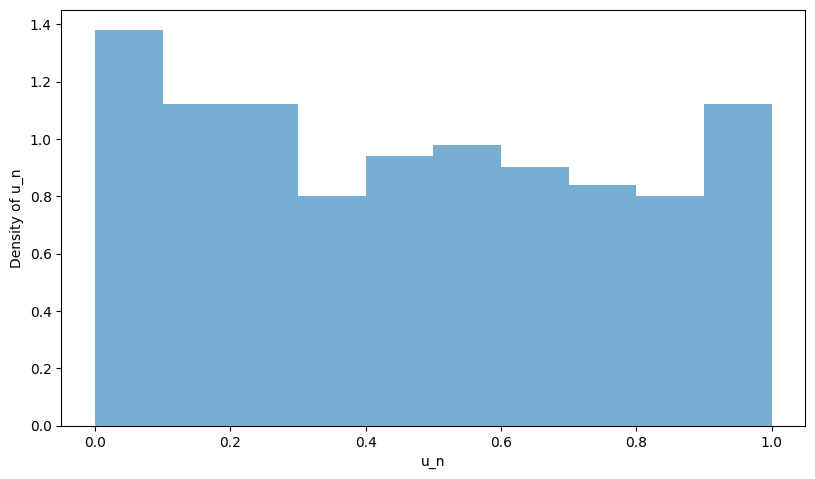

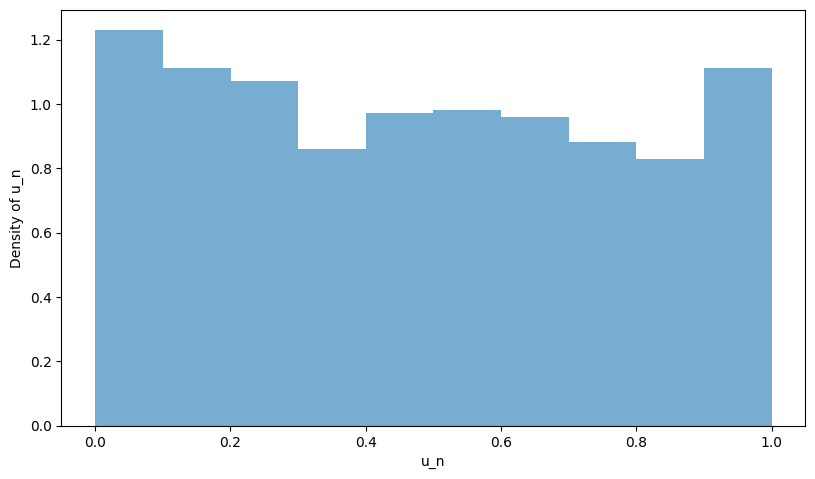

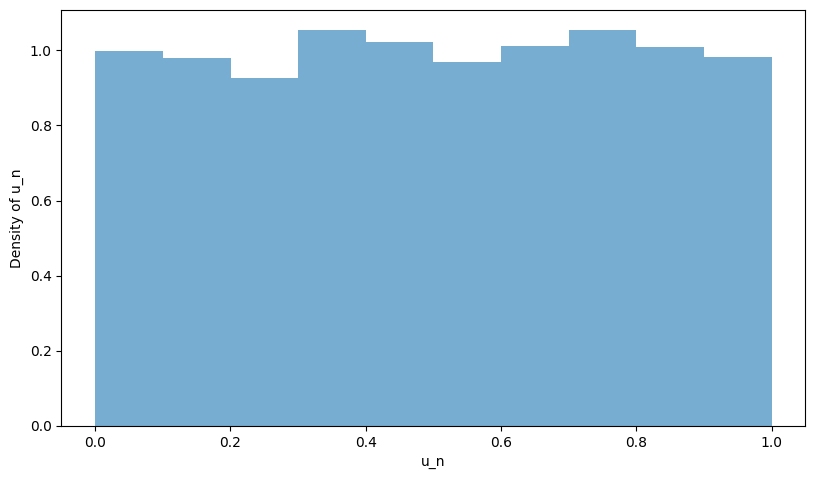

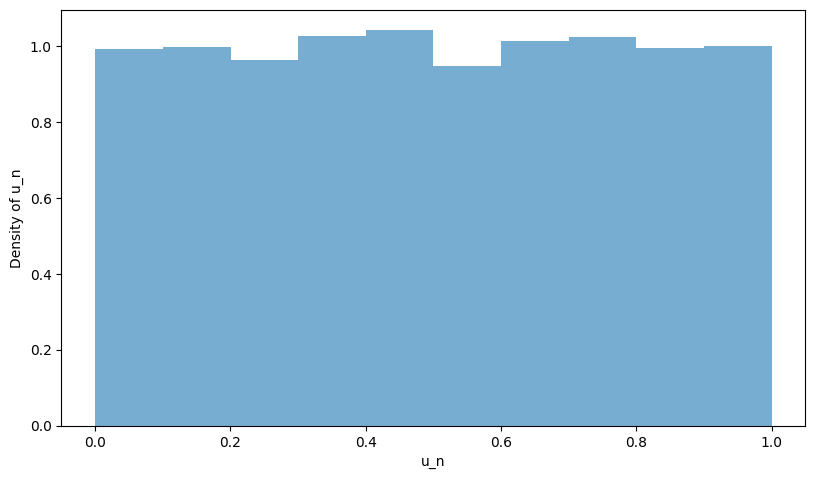

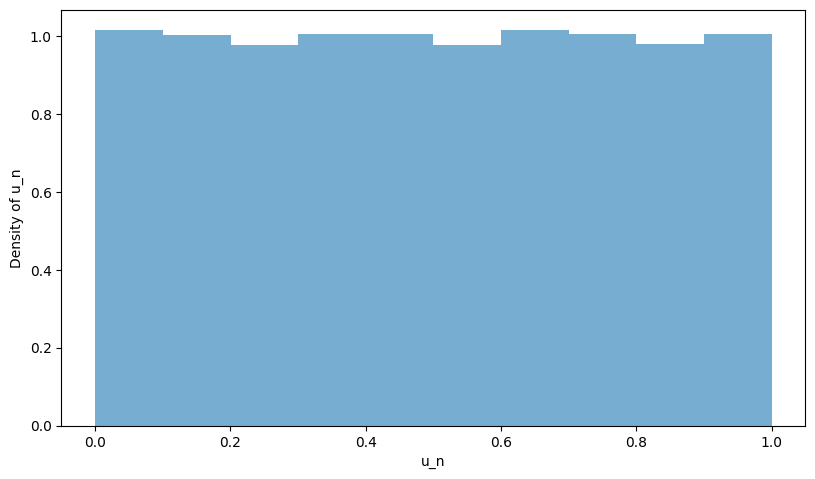

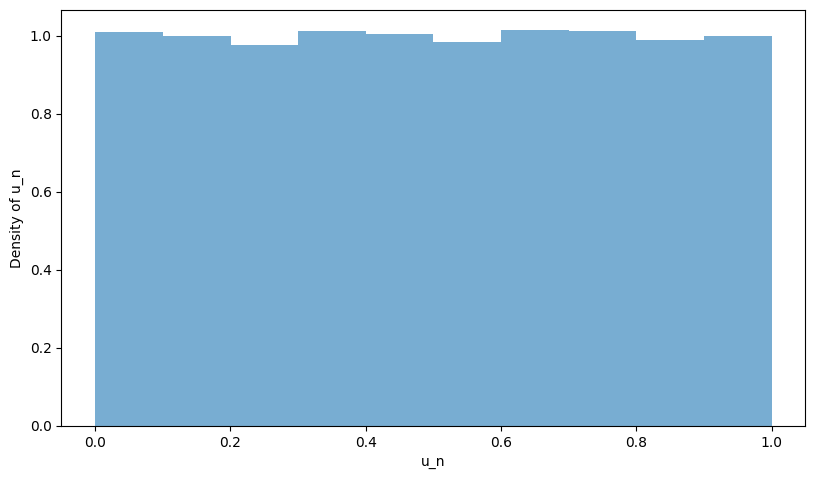

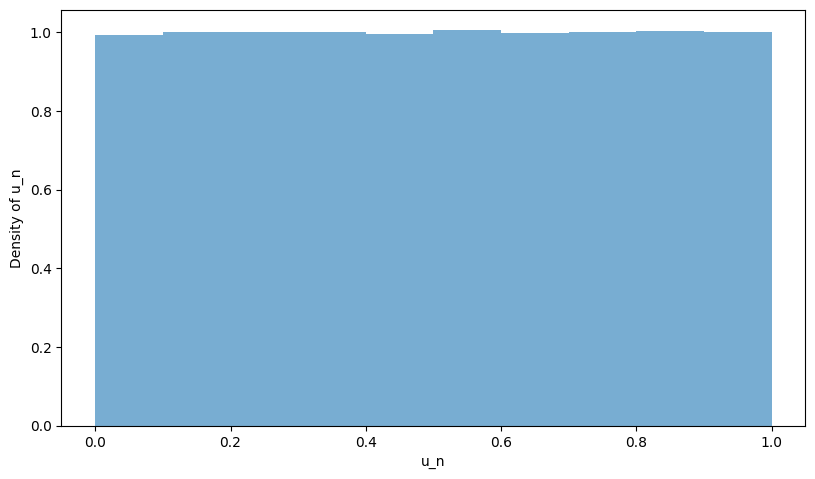

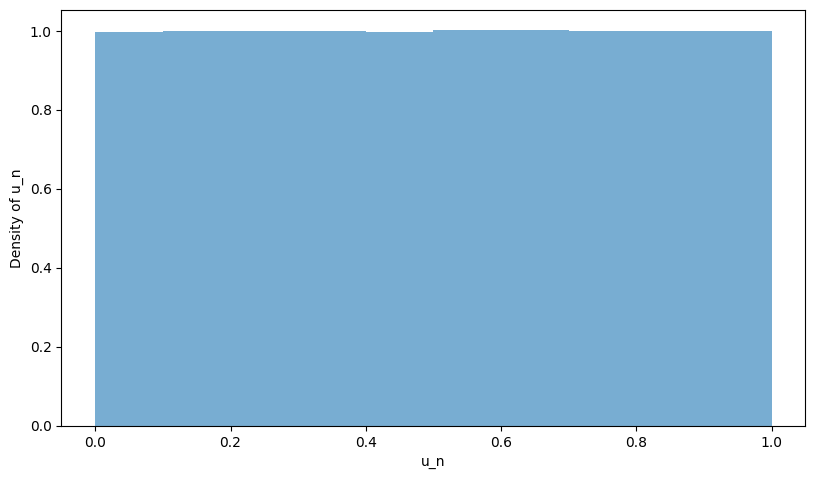

In [ ]:
x0 = (seed % 1000 + 1) / 1001.0     # Initial value based on seed

for n in num_samples:
    plt.figure
    u = logistic_map_sequence(n, x0, 4)
    plt.hist(
        u,
        density = True,
        alpha = 0.6,
        label = 'Histogram of Logistic Sequence'
    )
    plt.xlabel('u_n')
    plt.ylabel('Density of u_n')
    plt.show()

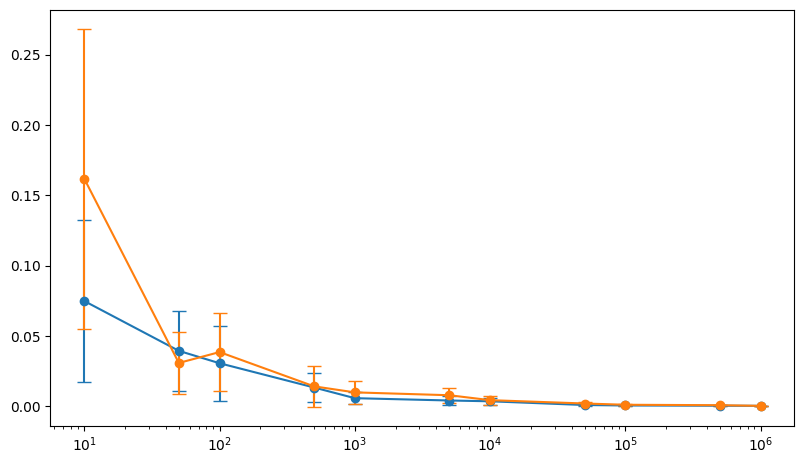

In [16]:
# Use Hit or Miss Method to estimate Pi

def estimate_pi_hit_or_miss_logistic(num_samples, seed = 42):
    """Hit-or-Miss estimate of pi with random numbers generated from logistic sequence.
    Arguments:
        num_samples (int): Number of random samples to draw.
        x0 (int): the first number of logistic sequence.
    Returns:
        float: Estimated value of pi.
    """
    x0 = (seed % 1000 + 1) / 1001.0
    # make a y0 different from x0
    y0 = x0**3
    
    x = logistic_map_sequence(num_samples, x0, 4)
    y = logistic_map_sequence(num_samples, y0, 4)
    inside_circle = np.count_nonzero(x**2 + y**2 < 1)
    return 4 * inside_circle / num_samples

# Compute the relative errors
mean_relative_errors_hit_or_miss_logistic = []
stdev_relative_errors_hit_or_miss_logistic = []

for n in num_samples:       # Loop over different sample sizes
    pi_estimates = [estimate_pi_hit_or_miss_logistic(n, s) for s in seeds]
    relative_errors = [relative_error(est) for est in pi_estimates]
    mean_relative_error = np.mean(relative_errors)
    stdev_relative_error = np.std(relative_errors)
    mean_relative_errors_hit_or_miss_logistic.append(mean_relative_error)
    stdev_relative_errors_hit_or_miss_logistic.append(stdev_relative_error)
    
plt.errorbar(
    num_samples,
    mean_relative_errors_hit_or_miss_logistic,
    yerr = stdev_relative_errors_hit_or_miss_logistic,
    fmt = "o",
    ls = '-',
    capsize = 5
)
plt.errorbar(
    num_samples,
    mean_relative_errors,
    yerr = stdev_relative_errors,
    fmt = 'o',
    ls = '-',
    capsize = 5
)
plt.xscale('log')
plt.yscale('linear')

##### Discussions

用 logistic 映射作为随机数的生成器比直接调用 ``np.random`` 函数得到的结果要好，这可能是因为 logistic 映射产生的随机数分布更加接近估算 $\pi$ 值所需要的分布.

具体而言，我们在让 logistic 映射变成均匀分布时使用了变换 $u_n = 2/\pi\cdot\arcsin(\sqrt{x_n})$，这里已经用到了 $\pi$ 的真实值，那么无形中可能优化了这个估算 $\pi$ 的算法；另外，logistic 映射本身是可以遍历 $(0,1)$ 的整个区间的，而 ``np.random`` 函数有很长的周期 $2^{19937} - 1$ (而不是遍历 $(0,1)$ 的所有可能值)，或许这造成了两者效果的差异.

### Note: steps for submitting the exercise

1. In the menu bar, select `File > Download` to download your notebook as a `.ipynb` file.
2. Select `File > Save and Export Notebook As > PDF` to export your notebook as a PDF file.
3. Combine the `.ipynb` and `.pdf` files into a single `.zip` or `.tar.gz` archive.
4. Upload your archive to the web learning platform (网络学堂).